<a href="https://colab.research.google.com/github/pondbaahh/multivariate/blob/main/Chapter_4_MDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Multidimensional Scaling
คือ การลดขนาดของตัวที่มีหลายตัวแปร/หลาย dimension จากที่มีเยอะก็ลดให้มันเหลือน้อยๆ



วิธีทำ MDS

-จะเริ่มจากการคำนวณระยะห่างระหว่างจุดแต่ละจุด ว่ามีระยะห่างเท่าไหร่

-เลือกจุดๆนึงเป็นจุดตั้งต้น แล้วมาหาจุดที่มีระยะห่างน้อยไปถึงมาก

-โดยเมื่อนำระยะห่างมาเท่ากับจุดต้น 

-ระยะห่างจากจุดอื่นๆต้องมีระยะห่างเท่าเดิมไม่เปลี่ยนแปลง

 PCA ทุกจุดอยู่ที่เดิม MDS ทุกจุดจะยึดจุดตั้งต้นที่กำหนดเป็นหลัก

# Multidimensional Scaling

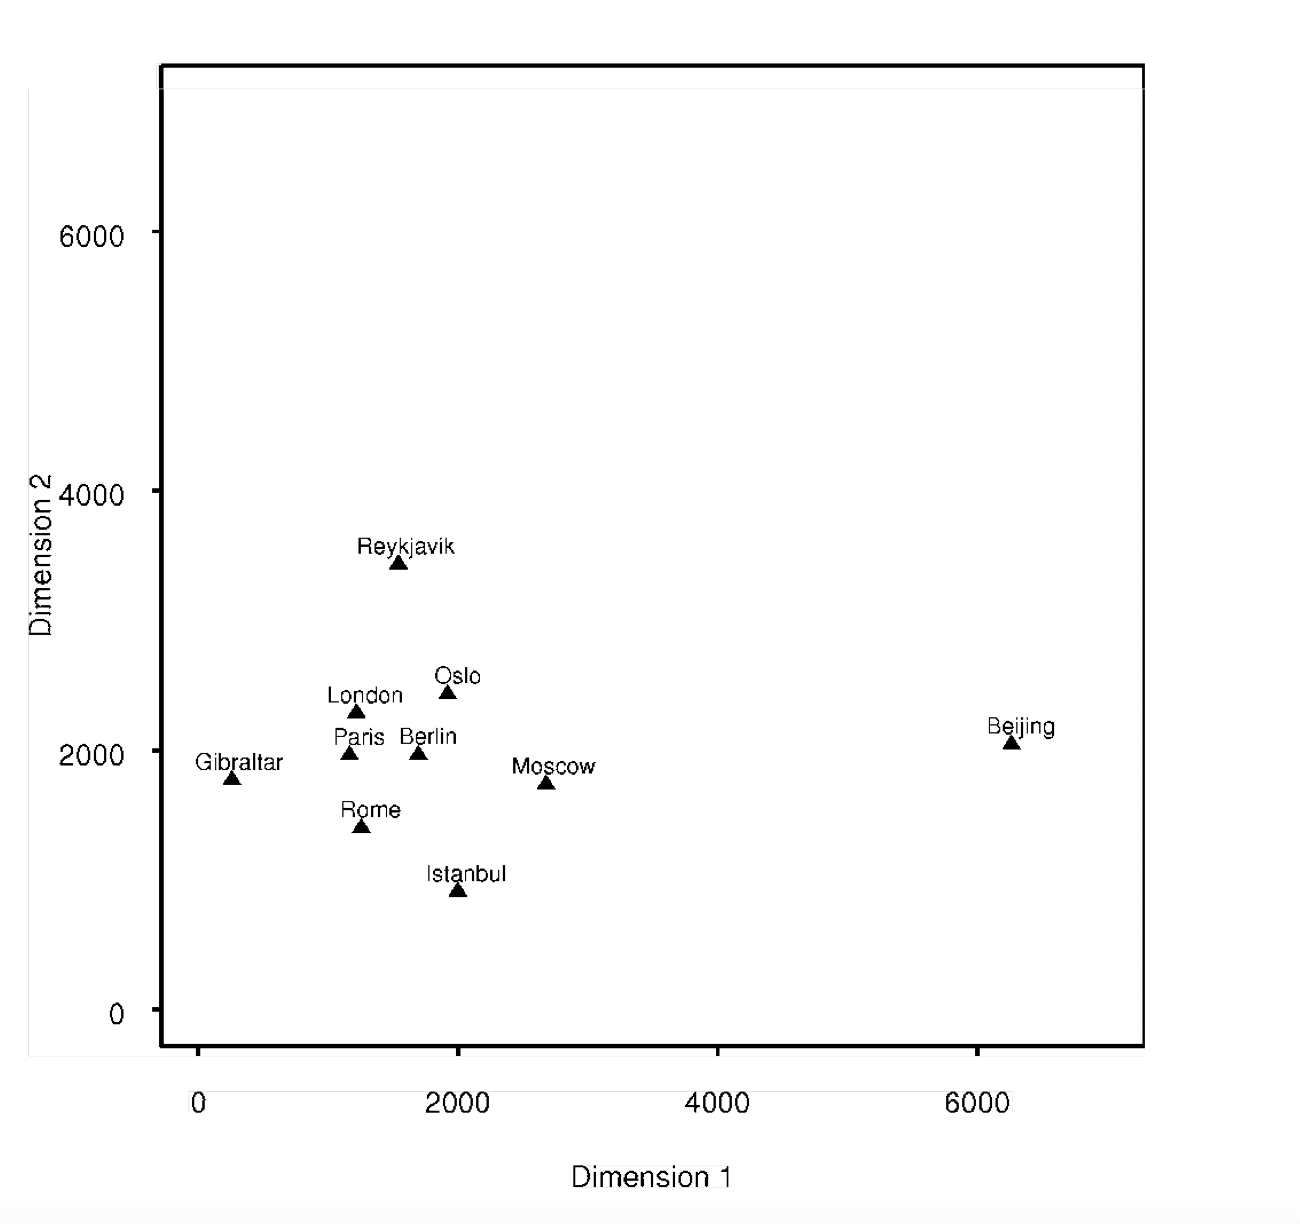

### Example on lris dataset

In [5]:
import pandas as pd 

In [6]:
example_df = pd.read_csv('https://raw.github.com/pandas-dev/pandas/master/pandas/tests/io/data/csv/iris.csv')
example_df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### ลอง plot PCA เพื่อเปรียบเทียบกับ วิธี MDS

In [7]:
from sklearn.decomposition import PCA

In [8]:
pca = PCA(n_components=2)

In [9]:
new_pca = pca.fit_transform(example_df.iloc[:,:-1]) #เอาทุกแถวยกเว้น column สุดท้าย

In [10]:
from matplotlib import pyplot as plt

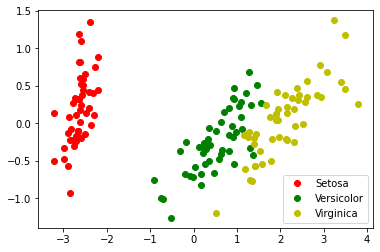

In [11]:
plt.plot(new_pca[:50,0],new_pca[:50,1],'or',label='Setosa')
plt.plot(new_pca[50:100,0],new_pca[50:100,1],'og',label='Versicolor')
plt.plot(new_pca[100:,0],new_pca[100:,1],'oy',label='Virginica')
plt.legend()
#plt.title('Iris'); #ตั้งชื่อกราฟโดยใช้ .title

### MDS (Multidimensional Scaling)

#### Distance

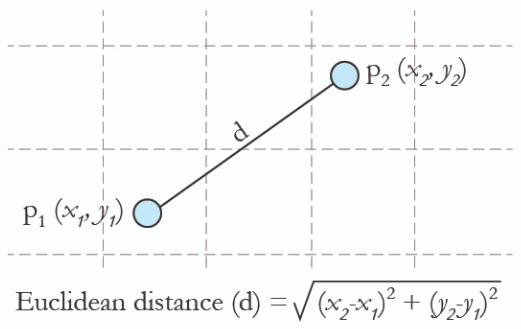

Distance ระยะห่างระหว่างจุด

In [12]:
X1 = example_df.iloc[0,:-1].to_numpy() #เรียกจุดที่1 เอาเฉพาะ column ที่เป็นตัวเลขไม่เอา column ที่เป็นชื่อ
X1
#ค่าที่เทียบ 5.1	3.5	1.4	0.2

array([5.1, 3.5, 1.4, 0.2], dtype=object)

In [13]:
X2 = example_df.iloc[1,:-1].to_numpy() #จุดที่ 2 
X2

array([4.9, 3.0, 1.4, 0.2], dtype=object)

คำนวณระยะห่างระหว่างจุดแบบ Euclidean distance

In [14]:
import numpy as np

In [15]:
dist = np.linalg.norm(X1-X2) #คำนวณระยะห่างระห่างจุด
dist
#ระยะห่างระหว่าง x1 and x2 เท่ากับ 0.5385164807134502

0.5385164807134502

In [16]:
#ลองคำนวณมือ 
(0.04+0.25)**(1/2)

0.5385164807134504

## Distance Matrix
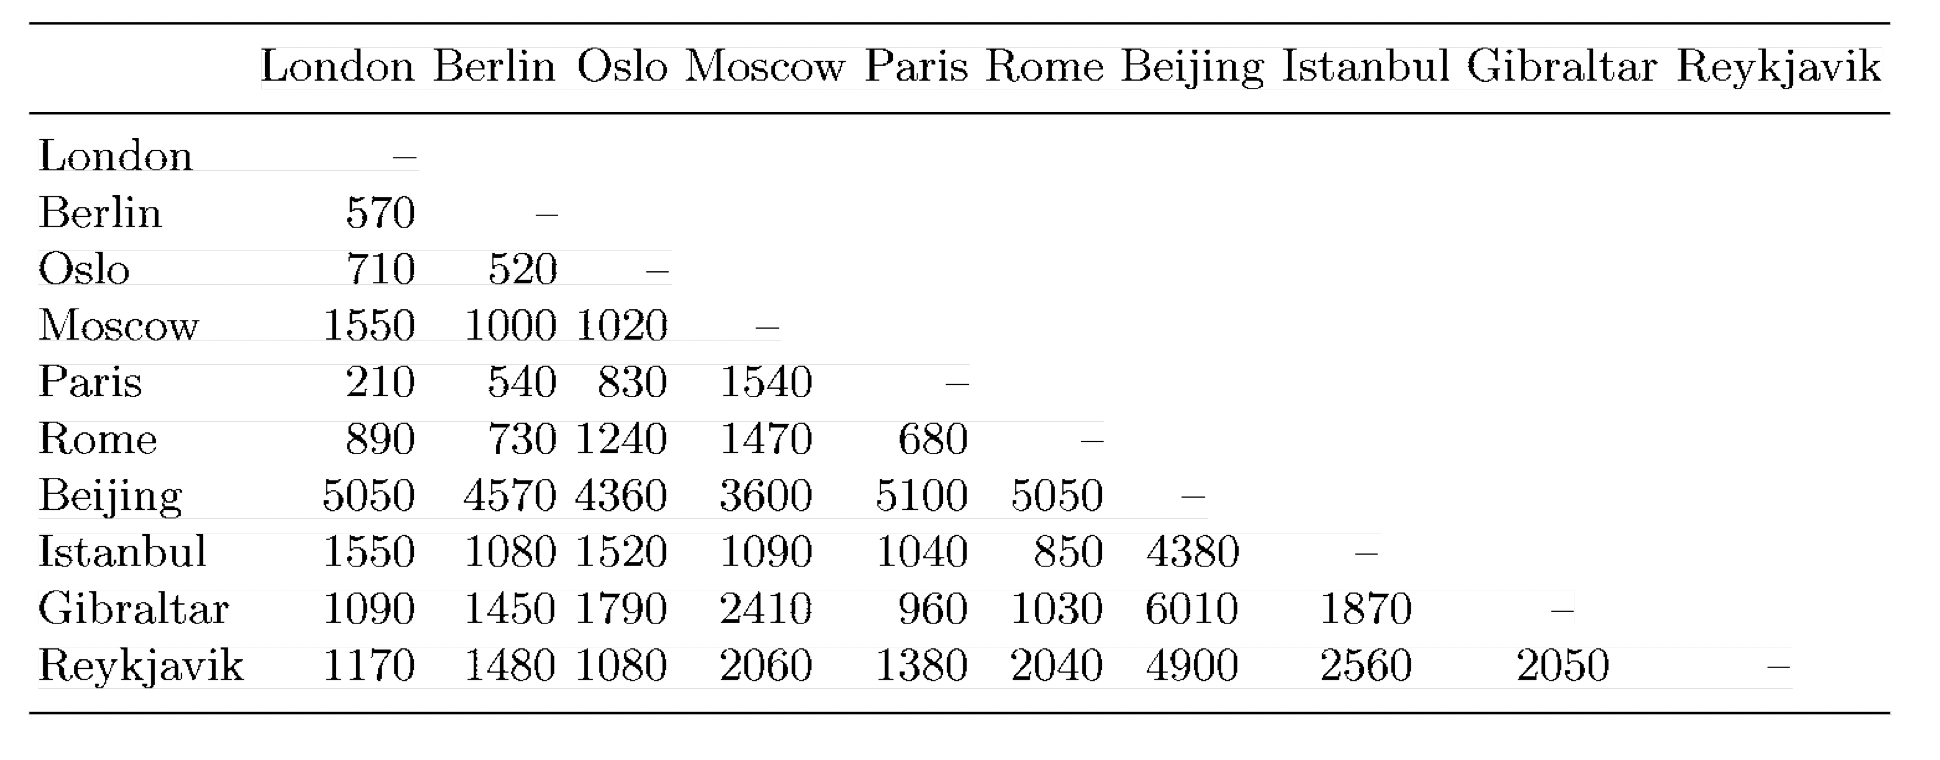

In [17]:
from sklearn.metrics import pairwise_distances
dis_matrix = pairwise_distances(example_df.iloc[:,:-1])
dis_matrix #ตัวสำคัญที่ต้องใส่ใน pairwise_distances คือตัว X ซึ่งเป็นดาต้าของเรา
#เส้นเเทยงอยู่จุดเดียวกัน ห่างกัน 0 เพราะอยู่ที่เดียวกัน
#จุดที่ x1 กับ x2 ห่างกัน 0.5385164807134502

array([[0.        , 0.53851648, 0.50990195, ..., 4.45982062, 4.65080638,
        4.14004831],
       [0.53851648, 0.        , 0.3       , ..., 4.49888875, 4.71805044,
        4.15331193],
       [0.50990195, 0.3       , 0.        , ..., 4.66154481, 4.84871117,
        4.29883705],
       ...,
       [4.45982062, 4.49888875, 4.66154481, ..., 0.        , 0.6164414 ,
        0.64031242],
       [4.65080638, 4.71805044, 4.84871117, ..., 0.6164414 , 0.        ,
        0.76811457],
       [4.14004831, 4.15331193, 4.29883705, ..., 0.64031242, 0.76811457,
        0.        ]])

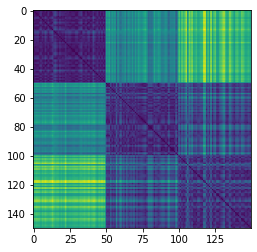

In [18]:
plt.imshow(dis_matrix) #ยิ่งค่าระยะห่างมากสีจะสว่าง ค่าระยะห่างน้อยสีจะเข้ม
#ข้อมูล 50 จุดแรก สีเข้ม เเสดงว่าค่าระยะห่างมันน้อย (50ถึง100,100ถึง150 ก็สีเข้มเหมือนกัน)


จากนั้นเรานำ distances_matrix ที่ได้นำไปทำ MDS เพื่อลด Dimention ให้นำไป plot กราฟได้ดีขึ้น

## ทำ MDS

In [19]:
from sklearn.manifold import MDS

In [20]:
mds = MDS(n_components=2)

In [21]:
new_mds = mds.fit_transform(example_df.iloc[:,:-1])

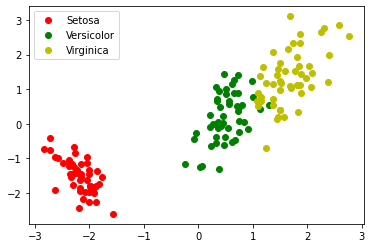

In [22]:
plt.plot(new_mds[:50,0],new_mds[:50,1],'or',label='Setosa')
plt.plot(new_mds[50:100,0],new_mds[50:100,1],'og',label='Versicolor')
plt.plot(new_mds[100:,0],new_mds[100:,1],'oy',label='Virginica')
plt.legend()
 #ตั้งชื่อกราฟโดยใช้ .title

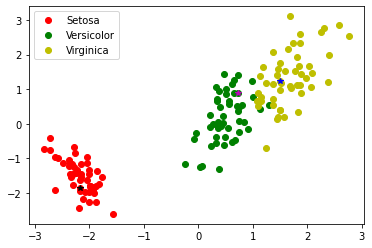

In [23]:
plt.plot(new_mds[:50,0],new_mds[:50,1],'or',label='Setosa')
plt.plot(new_mds[50:100,0],new_mds[50:100,1],'og',label='Versicolor')
plt.plot(new_mds[100:,0],new_mds[100:,1],'oy',label='Virginica')
plt.plot(new_mds[6,0],new_mds[6,1],'*k')
plt.plot(new_mds[56,0],new_mds[56,1],'*m')
plt.plot(new_mds[116,0],new_mds[116,1],'*b')
plt.legend()
 #ตั้งชื่อกราฟโดยใช้ .title

### การใช้ Pre-computed Distance Matrix



In [24]:
dis_matrix = pairwise_distances(example_df.iloc[:,:-1],metric = 'cityblock') 

In [25]:
mds2 = MDS(n_components=2,dissimilarity='precomputed') 

In [26]:
new_mds2 = mds2.fit_transform(dis_matrix)

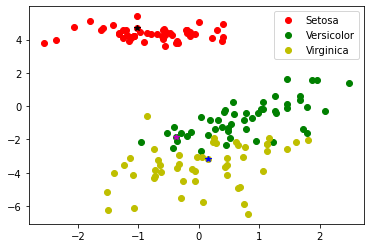

In [27]:
plt.plot(new_mds2[:50,0],new_mds2[:50,1],'or',label='Setosa')
plt.plot(new_mds2[50:100,0],new_mds2[50:100,1],'og',label='Versicolor')
plt.plot(new_mds2[100:,0],new_mds2[100:,1],'oy',label='Virginica')
plt.plot(new_mds2[6,0],new_mds2[6,1],'*k')
plt.plot(new_mds2[56,0],new_mds2[56,1],'*m')
plt.plot(new_mds2[116,0],new_mds2[116,1],'*b')
plt.legend()
 #ตั้งชื่อกราฟโดยใช้ .title  #จุดใกล้ก็ใกล้กันเหมือนเดิม ไกลก็ไกลกันเหมือนเดิม


MDS ลดdimension โดยสนใจแค่ระยะห่างระหว่างจุดที่ใกล้กันก็ใกล้เหมือนเดิม อันนี้มันย้ายจุดเลย PCA รักษา shape ของจุดแค่เปลี่ยนมุมมอง

#Eample 2

https://jakevdp.github.io/PythonDataScienceHandbook/05.10-manifold-learning.html

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np


In [29]:
def make_hello(N=1000, rseed=42):
    # Make a plot with "HELLO" text; save as PNG
    #plot ให้เป็น "HELLO"
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)
    
    # Open this PNG and draw random points from it
    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])]

In [30]:
X = make_hello(1000) #จำนวนจุด 1000 จุด #N เท่ากับ จำนวนจุด

In [31]:
X.shape #ขนาดของ x 

(1000, 2)

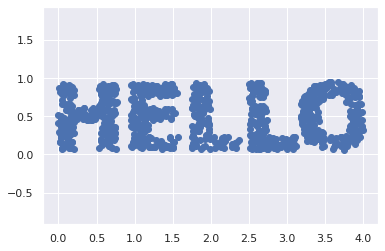

In [32]:
plt.scatter(X[:, 0], X[:, 1]) #แบบไม่ใส่สี
plt.axis('equal'); #ทำให้สเกลแต่ละเเถวเท่ากัน

In [33]:
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))
colorize

{'c': array([4.65390215e-05, 5.38772018e-04, 2.61356305e-03, 5.41450286e-03,
        1.74530786e-02, 2.02463354e-02, 2.20884685e-02, 2.55434869e-02,
        2.75118489e-02, 2.78085221e-02, 3.32797689e-02, 3.61538763e-02,
        3.73264793e-02, 3.96952845e-02, 4.11379837e-02, 4.32443345e-02,
        4.52101464e-02, 4.54145791e-02, 4.64821596e-02, 4.68264429e-02,
        4.84830986e-02, 4.96161451e-02, 5.20076940e-02, 5.23778264e-02,
        5.47296590e-02, 5.75739545e-02, 5.87735546e-02, 6.18264661e-02,
        7.02094535e-02, 7.24407353e-02, 7.35627062e-02, 7.64643777e-02,
        7.65794720e-02, 7.67691073e-02, 7.88421510e-02, 8.02847911e-02,
        8.37364713e-02, 8.72935871e-02, 8.84942061e-02, 8.97035566e-02,
        9.45543442e-02, 9.48310146e-02, 9.67670556e-02, 9.98866485e-02,
        1.01545423e-01, 1.01676507e-01, 1.02568263e-01, 1.02758579e-01,
        1.03247628e-01, 1.06045242e-01, 1.08383970e-01, 1.14609710e-01,
        1.21854745e-01, 1.23823164e-01, 1.24596371e-01, 1.2

In [34]:
colorize['c'].shape #c ค่าในแนวแกนx

(1000,)

In [35]:
colorize['cmap']  #cmapมี 5 ตัว

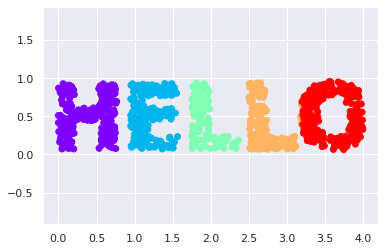

In [36]:
plt.scatter(X[:, 0], X[:, 1], **colorize) #สีที่ใส่แต่ละตัว
plt.axis('equal');

In [37]:
def rotate(X, angle): #คำสั่งสำหรับหมุน
    theta = np.deg2rad(angle)
    R = [[np.cos(theta), np.sin(theta)],
         [-np.sin(theta), np.cos(theta)]]
    return np.dot(X, R)

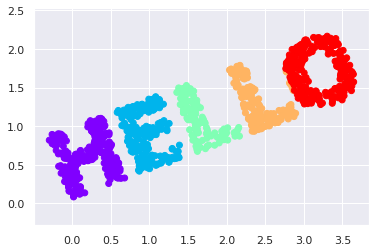

In [38]:
X2 = rotate(X, 20)  #หมุนไป 20 องศา
plt.scatter(X2[:, 0], X2[:, 1], **colorize) #pltที่หมุนไปแล้วใส่สี
plt.axis('equal');

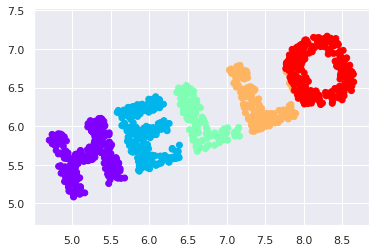

In [39]:
X2 = rotate(X, 20) + 5 #หมุนไป 20 องศา เลื่อนไปแนวแกนx 5 หน่วย  แกนy 5 หน่วย
plt.scatter(X2[:, 0], X2[:, 1], **colorize) #pltที่หมุนไปแล้วใส่สี
plt.axis('equal'); # ; ใส่เพื่อให้สวยงามไม่โชว์อะไร

### MDS

In [40]:
from sklearn.metrics import pairwise_distances #ดูระยะห่างของจุดแต่ละจุด
D = pairwise_distances(X) #เอา X มา plot
D.shape

(1000, 1000)

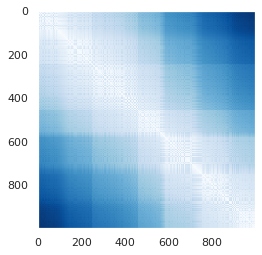

In [41]:
plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest')
#เส้นแทยงมุมเป็น 0
#plot แบบนี้จะไม่รู้ว่าสีเข้มสีสว่างคืออะไร ห่างกันเท่าไหร่

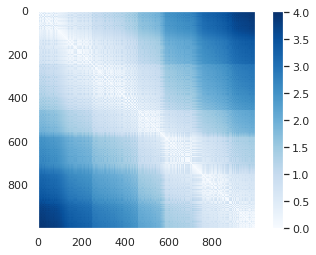

In [42]:
plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar();#ทำให้รู้ว่าสีขาวหรือน้ำเงิน คืออะไรในรูป รู้ว่าห่างกันเท่าไหร่
#จุดที่ 1 และ 1000 ห่างกันประมาณ 4 ห่างที่สุดเเล้ว
#ค่ากระโดดเพราะมีช่องว่างที่ใหญ่บ้างเล็กบ้าง

In [43]:
D2 = pairwise_distances(X2) #X2 คือ x ที่หมุนเเล้ว

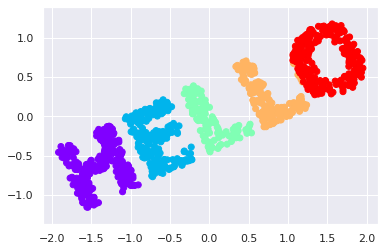

In [44]:
from sklearn.manifold import MDS
model = MDS(n_components=2, dissimilarity='precomputed', random_state=1) #random_state fix ตัวเเรกคือ 1 เหมือนกันทุกตัว ไม่มีการสุ่ม
out = model.fit_transform(D) #dataก่อนที่จะหมุนสามารถสร้างรูป 'HELLO' กลับมาได้รึป่าว
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');

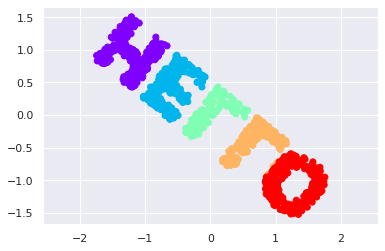

In [45]:
model = MDS(n_components=2, dissimilarity='precomputed')
out = model.fit_transform(D) 
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');
#ไม่มี ramdom_state จะทำให้ไม่fix ตัวเเรก และทำให้ค่าหมุนเละเลื่อน

MDS เรียกdata มาจาก distances  และคงความห่างมากที่สุก

### Quiz4 ทดลองทำ pca กับ ข้อมูล X แล้ว plotgraph
### และดูผลว่าการกระจายของข้อมูลมันเปลี่ยนไปหรือไม่ อย่างไร





In [46]:
from sklearn.decomposition import PCA

In [47]:
pca = PCA(n_components=2)

In [48]:
new_pca = pca.fit_transform(X)

In [49]:
new_pca.shape

(1000, 2)

In [50]:
new_pca

array([[-1.9337476 , -0.08154573],
       [-1.93360269,  0.01301875],
       [-1.93284845,  0.37256384],
       ...,
       [ 2.05704731, -0.03171414],
       [ 2.05815725, -0.1327384 ],
       [ 2.06207964, -0.15679672]])

In [51]:
from matplotlib import pyplot as plt

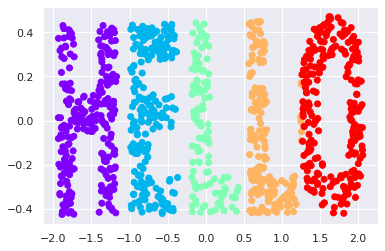

In [53]:
plt.scatter(new_pca[:,0],new_pca[:,1],**colorize)   #ได้เหมือนเดิม

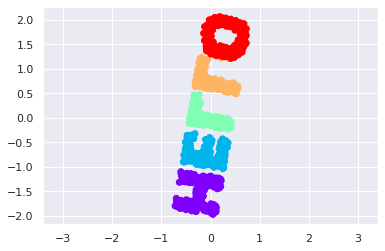

In [56]:
model = MDS(n_components=2, dissimilarity='precomputed') #จุดที่ใกล้กันเป็นใกล้ ไกลเป็นไกล #ไม่มีผลต่อความใกล้ ไกล ของจุด
out = model.fit_transform(D2) 
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');

In [ ]:
from sklearn.decomposition import PCA

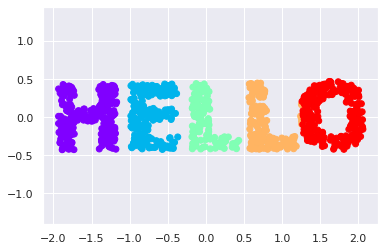

In [54]:
model = PCA(n_components=2) #pca หาการกระจายมากสุดให้เป็นแกนที่ 1 ถึงจะหมุนยังไง pca ก็จะทำให้กลับมาเป็นแบบเดิม ถ้า dimension เท่าเดิม
out = model.fit_transform(X2) 
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');

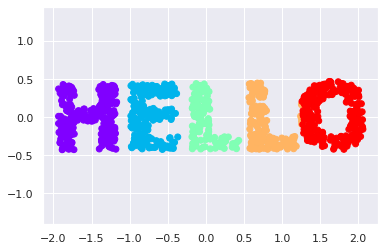

In [55]:
model = PCA(n_components=2) 
out = model.fit_transform(out) 
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');